Run previous code to gain past information

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Allegheny Center       4
Beltzhoover            4
                      ..
New Homestead          1
Oakwood                1
Perry North            1
Perry South            1
Windgap                1
Name: neighborhood, Length: 68, dtype: int64


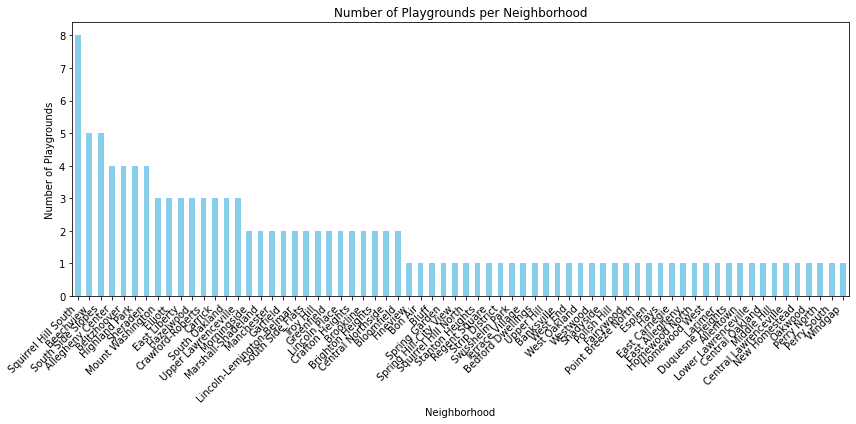

{'Bedford Dwellings': 10, 'Banksville': 10, 'Beechview': 4, 'Bloomfield': 10, 'Hazelwood': 4, 'Troy Hill': 4, 'East Hills': 4, 'Highland Park': 20, 'Homewood South': 10, 'Brighton Heights': 10, 'Greenfield': 10, 'Lincoln Place': 10, 'Shadyside': 4, 'Brookline': 10, 'South Side Flats': 20, 'Carrick': 10, 'Mount Washington': 10, 'Perry North': 10, 'Squirrel Hill South': 10, 'Sheraden': 10, 'Allegheny Center': 10, 'Beltzhoover': 4, 'Polish Hill': 10, 'Westwood': 10, 'South Side Slopes': 4, 'Lincoln-Lemington-Belmar': 4}


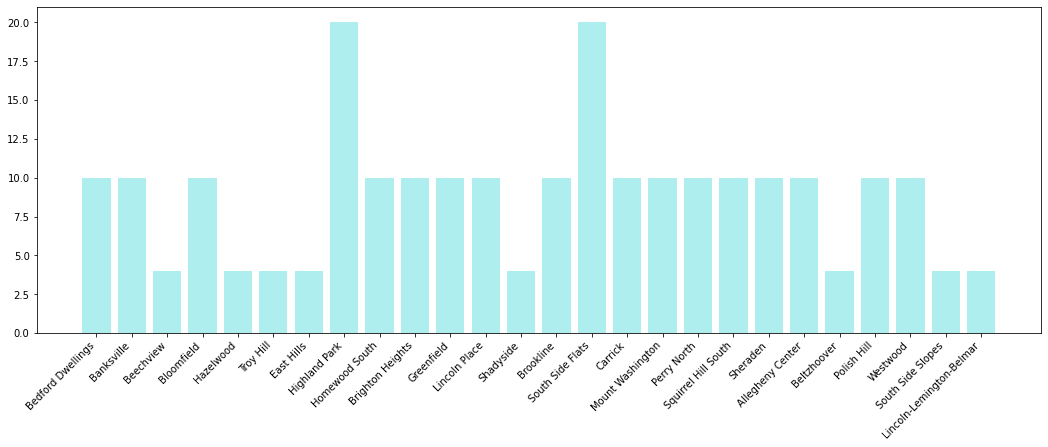

<ipython-input-4-5bf0482a2f6b>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  trees = pd.read_csv("citytrees.csv")


{'Homewood North': 180, 'Oakwood': 87, 'South Side Flats': 2179, 'East Allegheny': 564, 'Highland Park': 3260, 'Stanton Heights': 692, 'Sheraden': 387, 'Chartiers City': 64, 'Elliott': 195, 'Morningside': 435, 'Bloomfield': 1539, 'Friendship': 500, 'Garfield': 719, 'Polish Hill': 362, 'Lower Lawrenceville': 810, 'Central Northside': 807, 'East Liberty': 1488, 'Central Lawrenceville': 850, 'Shadyside': 1333, 'Allegheny Center': 1167, 'Homewood South': 260, 'Point Breeze North': 362, 'East Hills': 360, 'Homewood West': 74, 'Greenfield': 733, 'Hazelwood': 380, 'Squirrel Hill South': 5900, 'Marshall-Shadeland': 425, 'Brighton Heights': 827, 'North Shore': 701, 'Overbrook': 161, 'Knoxville': 492, 'Brookline': 980, 'South Side Slopes': 188, 'Arlington': 51, 'Arlington Heights': -1, 'Carrick': 708, 'Bedford Dwellings': 212, 'Central Business District': 1074, 'Bluff': 190, 'West Oakland': 81, 'South Oakland': 175, 'Squirrel Hill North': 2389, 'Point Breeze': 1360, 'Lincoln-Lemington-Belmar': 1

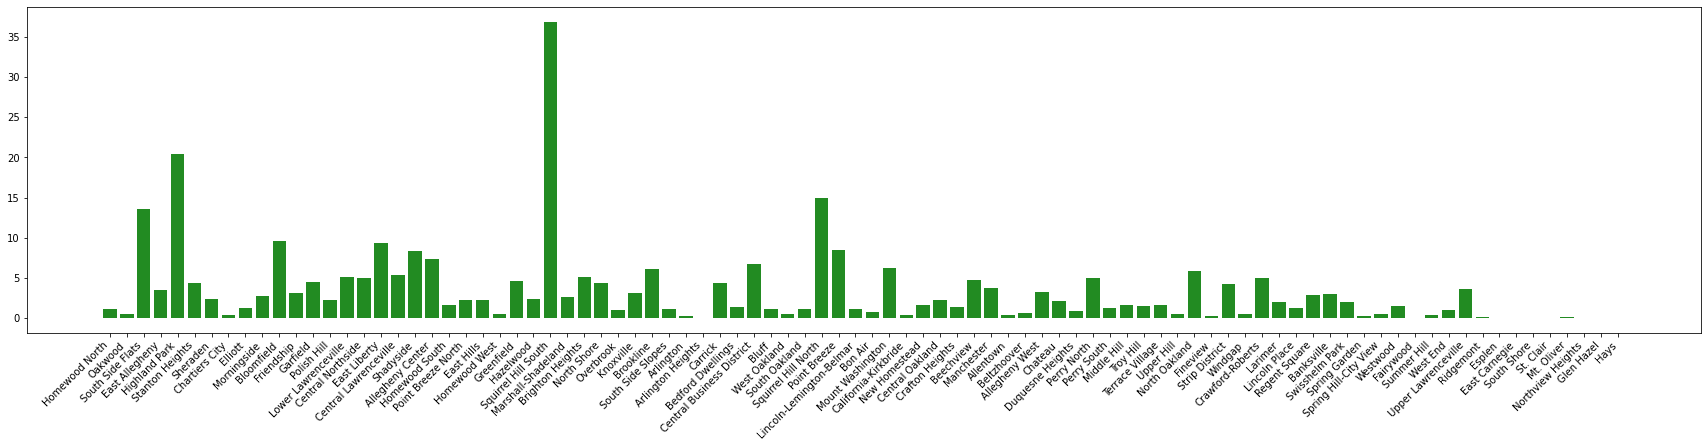

In [4]:
%run Playgrounds.ipynb
%run Pools.ipynb
%run Trees.ipynb

Loop in the dictionary files for Pools and Trees so they can combine, and create extra dictionary values based on the playgrounds data, which gives us the final points.

In [36]:
points = dict()

for key,value in poolPoints.items():
    if key in points:
        points[key] = points[key] + value
    else:
        points[key] = value
        
for key,value in treePoints.items():
    if key in points:
        points[key] = points[key] + value
    else:
        points[key] = value
# Calculate points for playgrounds

for _, r in df.iterrows():
    if r['neighborhood'] in points:
        points[r['neighborhood']] = points[r['neighborhood']] + 2  # Assuming each playground contributes 2 points
    else:
        points[r['neighborhood']] = 2        


print(points)

{'Bedford Dwellings': 224, 'Banksville': 486, 'Beechview': 770, 'Bloomfield': 1553, 'Hazelwood': 390, 'Troy Hill': 255, 'East Hills': 364, 'Highland Park': 3288, 'Homewood South': 270, 'Brighton Heights': 841, 'Greenfield': 747, 'Lincoln Place': 224, 'Shadyside': 1339, 'Brookline': 994, 'South Side Flats': 2203, 'Carrick': 724, 'Mount Washington': 1009, 'Perry North': 801, 'Squirrel Hill South': 5926, 'Sheraden': 405, 'Allegheny Center': 1185, 'Beltzhoover': 117, 'Polish Hill': 374, 'Westwood': 253, 'South Side Slopes': 202, 'Lincoln-Lemington-Belmar': 187, 'Homewood North': 182, 'Oakwood': 89, 'East Allegheny': 566, 'Stanton Heights': 694, 'Chartiers City': 64, 'Elliott': 201, 'Morningside': 439, 'Friendship': 500, 'Garfield': 723, 'Lower Lawrenceville': 812, 'Central Northside': 811, 'East Liberty': 1494, 'Central Lawrenceville': 852, 'Point Breeze North': 364, 'Homewood West': 76, 'Marshall-Shadeland': 429, 'North Shore': 701, 'Overbrook': 161, 'Knoxville': 492, 'Arlington': 51, 'Ar

Finally, we filter out any dictionary keys or values that cant combine and turn that into a final graph.

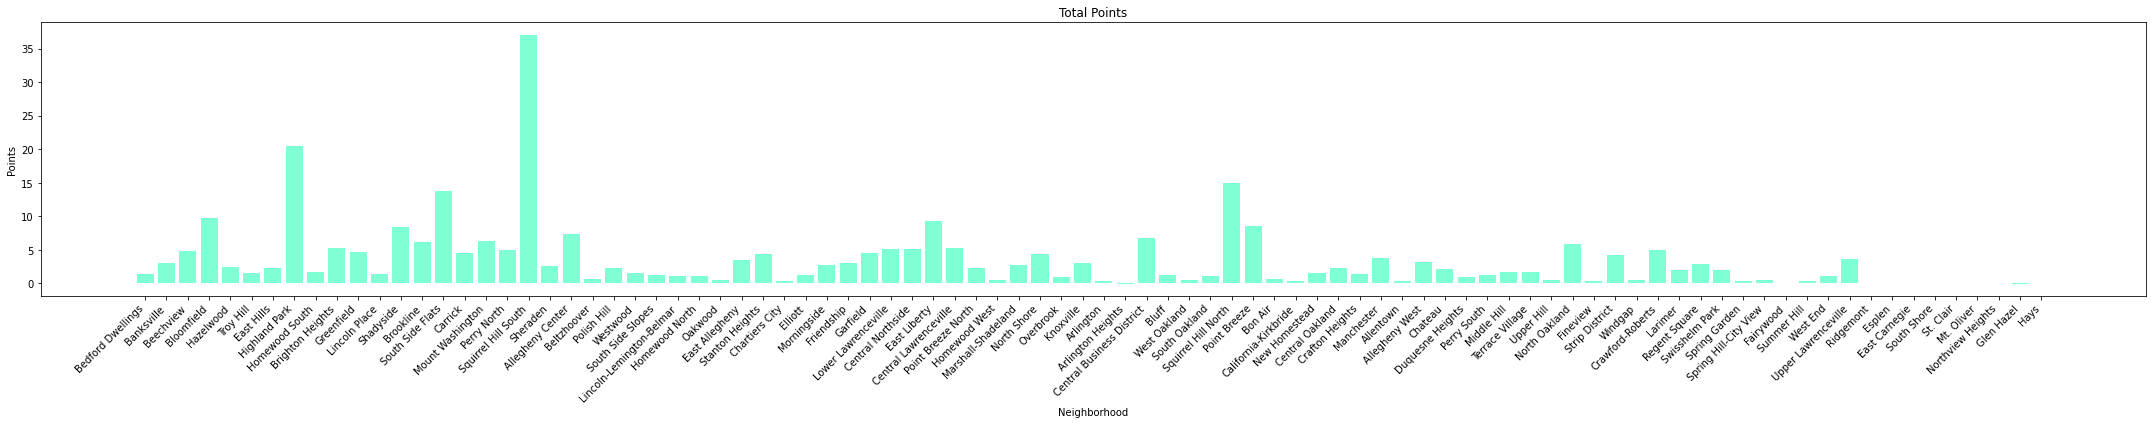

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

oldnames = (list(points.keys()))
oldscores = list(points.values())

names = []
scores = []

num =0
for x in oldnames:
    if type(x) == str:
        names.append(x)
        scores.append(oldscores[num])
    num = num + 1

num =0
for x in scores:
    scores[num] = scores[num]/160
    num = num + 1

plt.figure(figsize= (30, 6))
plt.bar(names, scores, color= 'aquamarine')
plt.xticks(rotation=45, ha='right')
plt.title('Total Points')
plt.xlabel('Neighborhood')
plt.ylabel('Points')
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()

plt.show()